### 3주차 23.3.20

### 4.1 영상 속성

In [4]:
import cv2
import numpy as np

img = cv2.imread('c:/data/lena.jpg')
gray_img = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

print('img.ndim = ', img.ndim) # 차원의 수 칼라는 3차원
print('img.shape = ', img.shape) # 3 채널
print('img.dtype = ', img.dtype)

print('gray_img.ndim = ', gray_img.ndim) # 차원의 수 흑백은 2차원
print('gray_img.shape = ', gray_img.shape) #1 채널
print('gray_img.dtype = ', gray_img.dtype)

img = img.astype(np.int32) # 화소 자료형을 정수형으로
print('img.dtype = ', img.dtype)

img = np.uint8(img)
print('img.dtype = ', img.dtype)

img.ndim =  3
img.shape =  (512, 512, 3)
img.dtype =  uint8
gray_img.ndim =  2
gray_img.shape =  (512, 512)
gray_img.dtype =  uint8
img.dtype =  int32
img.dtype =  uint8


### 4.2 영상 속성 2: 모양 변경

img.shape =  (512, 512, 3)
img.shape =  (786432,)
img.shape =  (3, 512, 512)


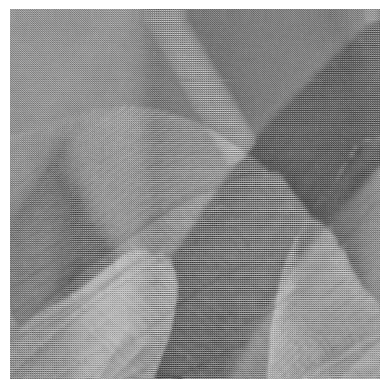

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:/data/lena.jpg')

print('img.shape = ', img.shape) # 3 채널

img = img.flatten()
print('img.shape = ', img.shape)

img = img.reshape(-1, 512, 512)
print('img.shape = ', img.shape)

plt.axis('off')
plt.imshow(img[0], cmap='gray')
plt.show()

# cv2.imshow('img', img[0])
# cv2.waitKey()
# cv2.destroyAllWindows()

### 4.5 화소접근3: 컬러영상

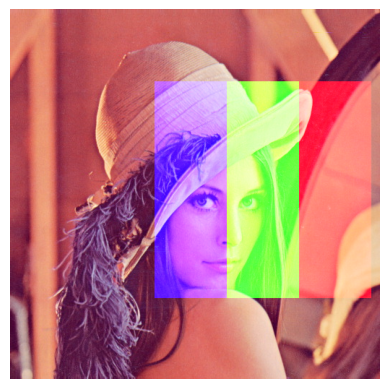

In [13]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('c:/data/lena.jpg')

img[100:400, 200:300, 0] = 255 # b 최대
img[100:400, 300:400, 1] = 255 # g 최대
img[100:400, 400:500, 2] = 255 # r 최대

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)
plt.show()

### 4.7 마우스로 ROI(관심영역) 지정

* 마우스로 선택을 한 경우 해당 영역을 새로운 창으로 출력

roi =  (220, 219, 173, 158)


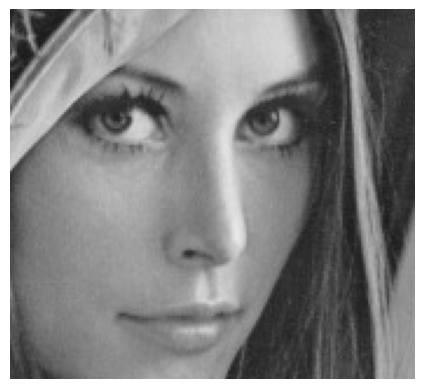

In [3]:
import cv2
from matplotlib import pyplot as plt


src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
roi = cv2.selectROI(src) # roi select 윈도우에 src 출력
print('roi = ', roi)

if roi != (0, 0, 0, 0):
    # roi[0] = x축 / roi[1] = y축 / roi[2] = 가로 / roi[3] = 세로
    img = src[roi[1]:roi[1] + roi[3],
              roi[0]:roi[0] + roi[2]]
    
    # plt를 이용한 ROI 출력
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
    # opencv 를 이용한 ROI 출력
    # cv2.imshow('img', img)
    # cv2.imwrite('../test.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9]) # 관심영역 이미지로 저장
    # cv2.waitKey()

# 마우스로 선택을 하지 않는 경우 좌표값만 출력

cv2.destroyAllWindows()

### 4.8 마우스로 다중 ROIs 영역 지정

* 마우스로 영역을 선택하고 space or enter를 눌러 저장한다.
* 여러번 실 시 후 esc를 누르면 선택한 영역을 img를 통해 보여주며 좌표를 출력하고 
* 맨 마지막에 선택된 영역을 전부 보여준다.

In [5]:
import cv2
src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE) 

# showCrosshair = False 선택영역 격자표시 x
# fromCenter = True 로 마우스 클릭 위치 중심을 기준으로 드래그 하여 박스 선택
rects = cv2.selectROIs('src', src, showCrosshair = False, fromCenter = True)
print('rects = ', rects)

for r in rects:
    cv2.rectangle(src, (r[0], r[1]), (r[0] + r[2], r[1] + r[3]), 255)
    
    img = src[r[1]:r[1] + r[3], r[0]:r[0] + r[2]]
    cv2.imshow('img', img)
    cv2.waitKey()
    
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

rects =  [[ 46 109 306 198]]


### 4.8.2 ROIs를 이용해 관심영역 저장

In [11]:
import cv2

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE) 

# showCrosshair = False 선택영역 격자표시 x
# fromCenter = True 로 마우스 클릭 위치 중심을 기준으로 드래그 하여 박스 선택
rects = cv2.selectROIs('src', src, showCrosshair = False, fromCenter = True)
print('rects = ', rects)

name = 1

for r in rects:
    
    img = src[r[1]:r[1] + r[3], r[0]:r[0] + r[2]]
    
    cv2.imwrite(f'../data/{str(name)}.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9])
    name += 1
    
    # 이걸 쓰지 말아야 중복되는 영역에 흰 선이 같이 저장되지 않음
    # cv2.rectangle(src, (r[0], r[1]), (r[0] + r[2], r[1] + r[3]), 255)
    
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

rects =  [[ 83 132 222 172]
 [324 250 122 262]
 [222   0 126 156]
 [225 238 186 274]]


### 4.9 영상 복사

In [18]:
import cv2
src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

# dst = src # 이것은 복사가 아닌 참조 형식이다, 객체 1개를 공유
dst  = src.copy() # 복사를 하는 경우 copy() 함수를 이용해줘야 한다. 서로 다른 객체를 이용

src[0:100, 200:400] = (255)
src[100:200, 200:400] = (150)
src[200:300, 200:400] = (0)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.10 영상복사 2

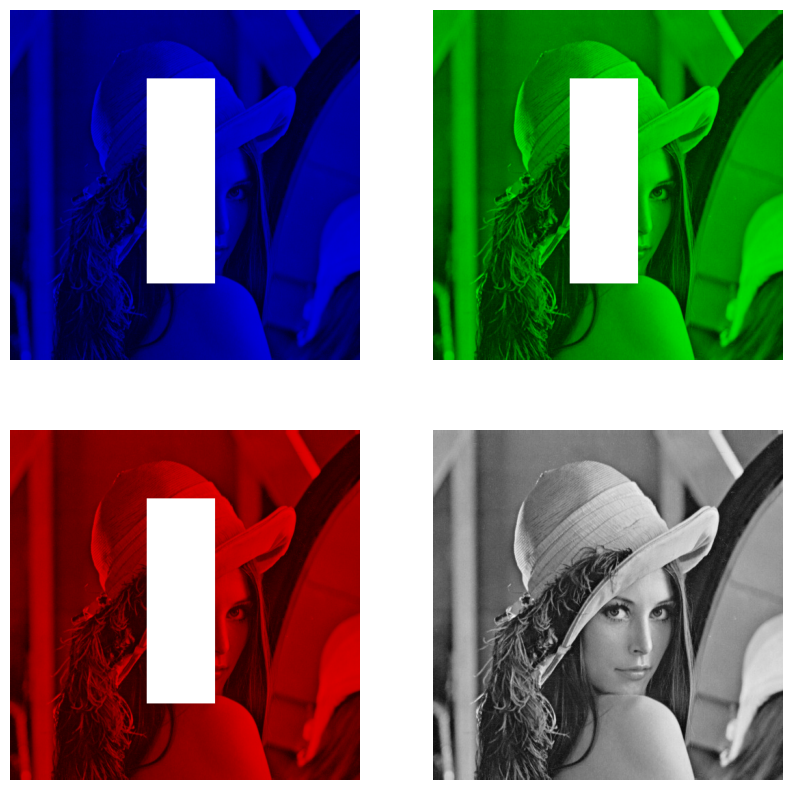

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
shape = src.shape[0], src.shape[1], 3
dst = np.zeros(shape, dtype=np.uint8) # 3채널 컬러 영상 생성

# 복사
dst1 = dst.copy()
dst2 = dst.copy()
dst3 = dst.copy()

dst1[:,:,0] = src # 그레이스케일의 b 부분
dst2[:,:,1] = src # 그레이스케일의 g 부분
dst3[:,:,2] = src # 그레이스케일의 r 부분

dst1[100:400, 200:300, :] = [255, 255, 255]
dst2[100:400, 200:300, :] = [255, 255, 255]
dst3[100:400, 200:300, :] = [255, 255, 255]

fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True)
fig.canvas.manager.set_window_title('plt')

ax[0][0].axis('off')
ax[0][0].imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))

ax[0][1].axis('off')
ax[0][1].imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))

ax[1][0].axis('off')
ax[1][0].imshow(cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB))

ax[1][1].axis('off')
ax[1][1].imshow(src, cmap='gray')

plt.show()

# cv2.imshow('src', src)
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

### 4.11 채널(색상) 분리, 분할 (중요)

* cv2.split()

<class 'tuple'>
<class 'numpy.ndarray'>


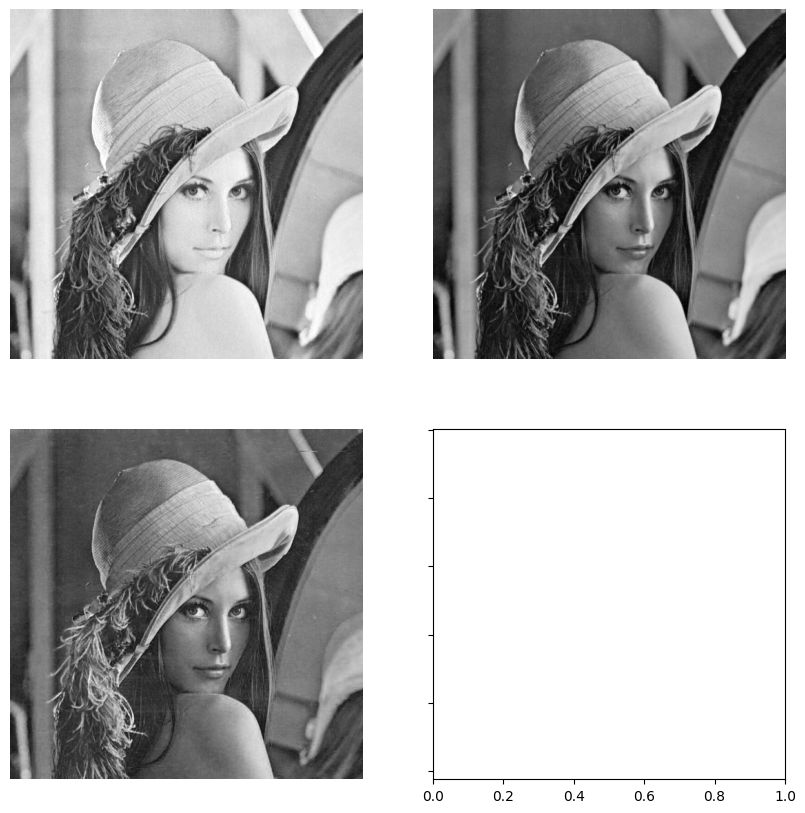

In [66]:
import cv2
src = cv2.imread('c:/data/lena.jpg')

dst = cv2.split(src) # 분할
print(type(dst))
print(type(dst[0]))

# cv2 출력
# cv2.imshow('blue', dst[0])
# cv2.imshow('green', dst[1])
# cv2.imshow('red', dst[2])
# cv2.waitKey()
# cv2.destroyAllWindows()

# plt 출력
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

# 왼쪽 상단
ax[0][0].axis('off')
ax[0][0].imshow(dst[2], aspect = 'auto', cmap='gray') # r

# 오른쪽 상단
ax[0][1].axis('off')
ax[0][1].imshow(dst[1], aspect = 'auto', cmap='gray') # g

# 왼쪽 하단
ax[1][0].axis('off')
ax[1][0].imshow(dst[0], aspect = 'auto', cmap='gray') # b

plt.show()


### 4.12 채널(색상) 병합 (중요)
* cv2.merge()

<class 'numpy.ndarray'>
(512, 512, 3)


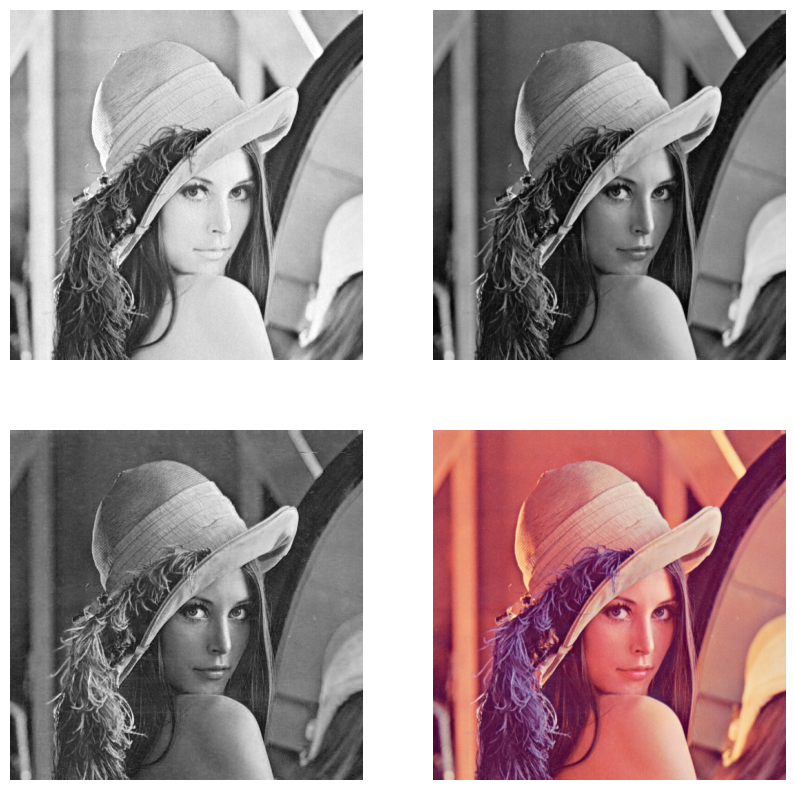

In [37]:
import cv2
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg')

b, g, r = cv2.split(src)
dst = cv2.merge([b, g, r]) # 병합, opencv에서는 b, g, r 순이므로

print(type(dst))
print(dst.shape)
# cv2.imshow('r', r)
# cv2.imshow('g', g)
# cv2.imshow('b', b)
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()

# plt 출력
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0][0].axis('off')
ax[0][0].imshow(r, aspect = 'auto', cmap='gray') # r

ax[0][1].axis('off')
ax[0][1].imshow(g, aspect = 'auto', cmap='gray') # g

ax[1][0].axis('off')
ax[1][0].imshow(b, aspect = 'auto', cmap='gray') # b

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
ax[1][1].axis('off')
ax[1][1].imshow(dst, aspect = 'auto') # dst

plt.show()


### 4.13 컬러 변환

In [52]:
import cv2
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) # 이미지 추출할 때 사용하는 확장자

# 크기 조정 가로 320, 세로 240
gray = cv2.resize(gray, dsize = (320, 240))
yCrCv = cv2.resize(yCrCv, dsize = (320, 240))
hsv = cv2.resize(hsv, dsize = (320, 240))

cv2.imshow('gray', gray)
cv2.imshow('yCrCv', yCrCv)
cv2.imshow('hsv', hsv)

cv2.waitKey()
cv2.destroyAllWindows()

# fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
# fig.canvas.manager.set_window_title('plt') # 창 이름

# ax[0][0].axis('off')
# ax[0][0].imshow(gray, aspect = 'auto', cmap='gray')

# ax[0][1].axis('off')
# ax[0][1].imshow(yCrCv, aspect = 'auto')

# ax[1][0].axis('off')
# ax[1][0].imshow(hsv, aspect = 'auto')
# plt.show()

### 4.14 영상 크기 변환 (중요)
* cv2.resize(src, dsize = (가로, 세로))

In [24]:
import cv2

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.resize(src, dsize = (320, 240)) # 가로 320, 세로 240
dst2 = cv2.resize(dst, dsize = (0, 0), fx = 1.5, fy = 1.2) # 가로를 1.5배, 세로를 1.2배로 만듬

cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.15 영상 회전 (중요)

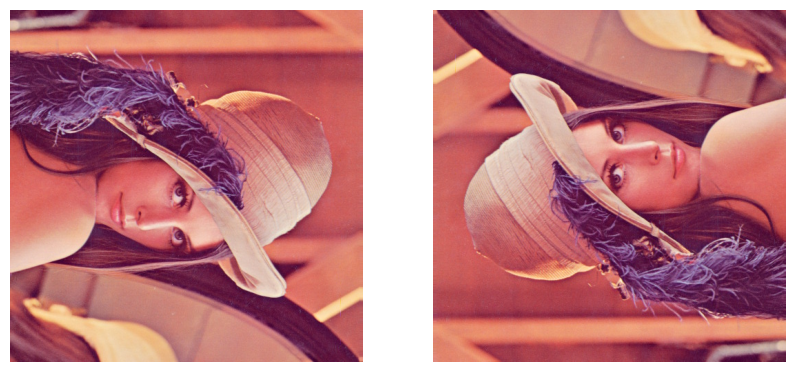

In [65]:
import cv2
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg')

dst1 = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도
dst2 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반 시계방향으로 90도

dst1 = cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize = (10, 10), sharey=True) # 1 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

# 시계방향 회전 사진
ax[0].axis('off')
ax[0].imshow(dst1)

# 반 시계방향 회전 사진
ax[1].axis('off')
ax[1].imshow(dst2)

plt.show()


### 4.20